Harrison Durbin  
Worldwide Happiness Survey Data  
Exploratory Data Analysis

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline
color = sns.color_palette()
sns.set(style="white", palette="muted", color_codes=True)
pd.set_option('display.max_columns', 120)

### Importing raw datasets

This is a list of the important features to extract from raw data
the code V### after the feature name is the variable code number

    Happiness (1-4), V10
    Country Code, V2A
    Marital Status, V57
    No. of Children, V58
    Religious, V147
    Social Class, V238
    Scale of Income, V239
    Age, V242
    Size of Town, V253
    Health, V11
    Thoughts about life meaning, V143
    Employment Status, V229
    Manual v Intellectual Work, V231 
    Routine v Creative Work, V232 
    Sex, V240
    Education, V248
    Prayer, V146


In [31]:
# for i in df_raw.keys():
#     print i,

In [32]:
# data set from World Value Survey
df_raw = pd.read_csv('WV6.csv')

In [33]:
names_code = ['V10','V2A','V57','V58','V147','V238','V239','V242','V253','V11','V143','V229',
         'V231','V232','V240','V248','V146']

names_desc = ['happiness','cntrycode','marriage','children','religious','socclass','income','age',
              'town','health','thoughts','employment','intellectualwork','creativework','sex',
              'education','prayer']

In [34]:
df_trimmed = df_raw[names_code]

In [35]:
df_trimmed.columns = names_desc

In [36]:
df_trimmed.describe()

,happiness,cntrycode,marriage,children,religious,socclass,income,age,town,health,thoughts,employment,intellectualwork,creativework,sex,prayer
count,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000,86272.000000
mean,1.835057,487.474036,2.706301,1.758068,1.195197,3.147707,4.660400,42.014060,2.650976,2.077627,1.787185,3.220280,3.778399,3.324196,1.518221,3.220129
std,0.799720,259.299426,2.192465,1.895438,1.048039,1.250020,2.392559,16.656577,4.232138,0.880559,0.940688,2.286921,4.099186,3.817907,0.524193,3.263545
min,-5.000000,12.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-4.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,1.000000,275.000000,1.000000,0.000000,1.000000,2.000000,3.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,504.000000,1.000000,2.000000,1.000000,3.000000,5.000000,40.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000
75%,2.000000,710.000000,6.000000,3.000000,2.000000,4.000000,6.000000,54.000000,7.000000,3.000000,2.000000,5.000000,7.000000,6.000000,2.000000,7.000000
max,4.000000,901.000000,6.000000,8.000000,3.000000,5.000000,10.000000,99.000000,8.000000,4.000000,4.000000,8.000000,10.000000,10.000000,2.000000,8.000000


In [37]:
df_countries = pd.read_csv('country_list.csv', header=None)
df_countries.columns = ['countryname','abbr2','abbr3','cntrycode','lat','lng']
df_countries.head()

,countryname,abbr2,abbr3,cntrycode,lat,lng
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [38]:
def createHist(col_name, shade = 0):
    
    val_counts = df_trimmed[col_name].value_counts()

    plt.figure(figsize=(10,1))
    sns.barplot(val_counts.index, val_counts.values, alpha=0.8, color=color[shade])
#     plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col_name, fontsize=8)
    plt.show()

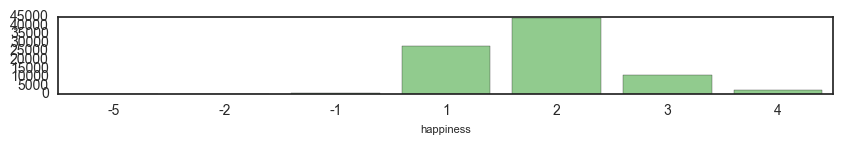

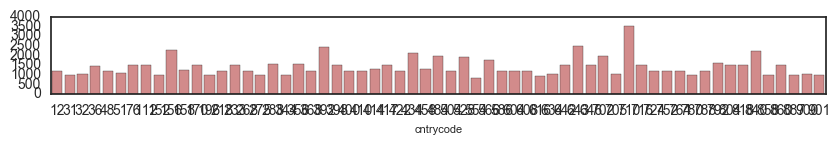

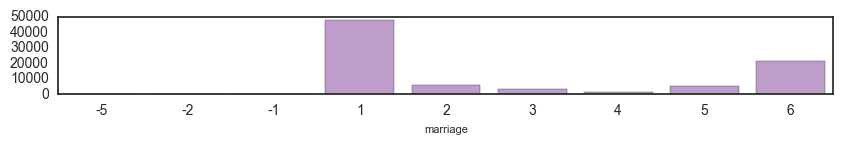

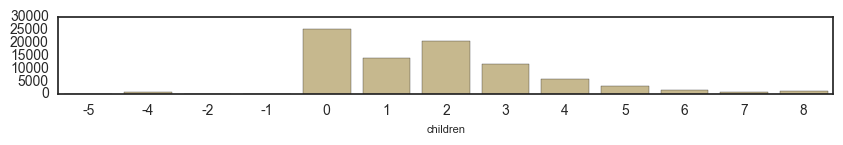

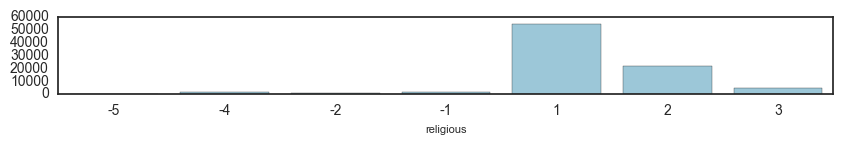

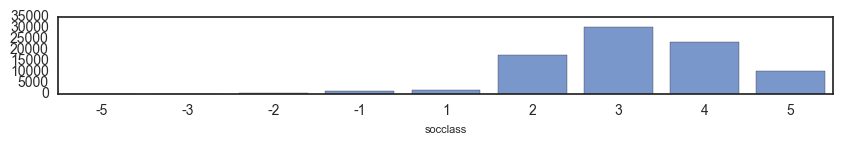

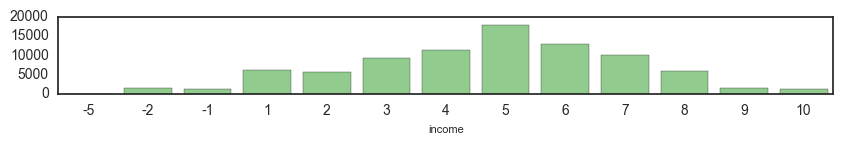

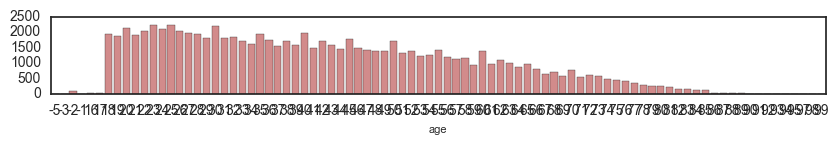

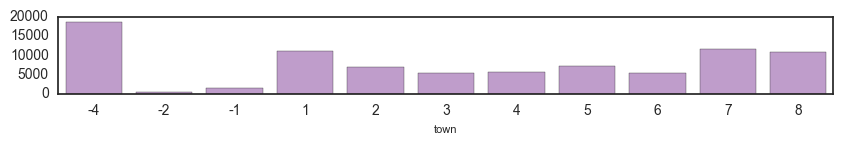

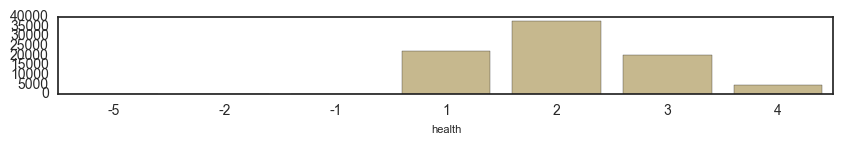

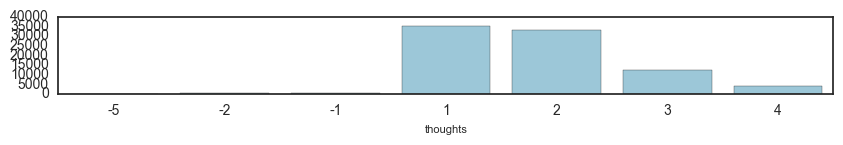

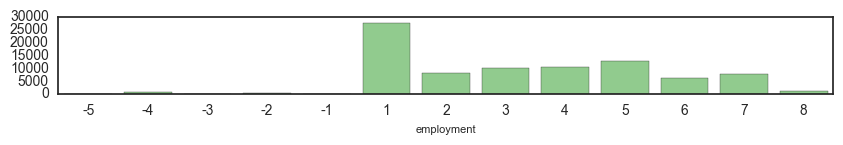

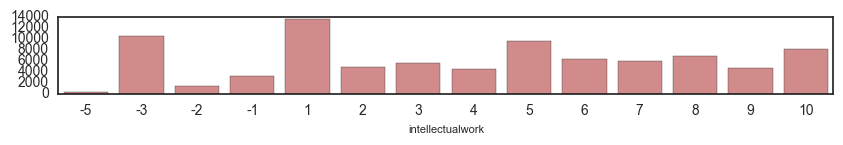

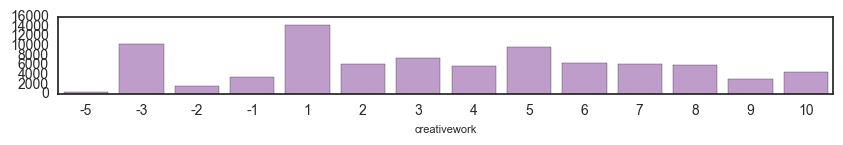

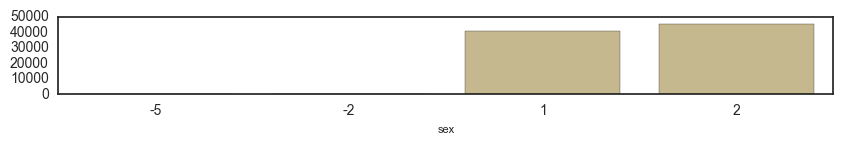

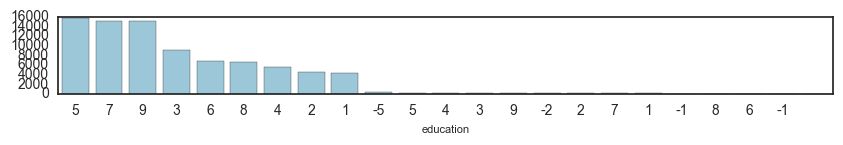

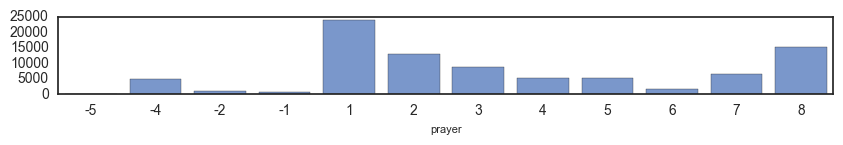

In [39]:
shade = -5
for i in names_desc:
    createHist(i, shade)
    shade += 1
    if shade > 5: shade = -5

In [40]:
df_merged = pd.merge(df_trimmed,df_countries)

In [41]:
df_merged.head().T

,0,1,2,3,4
happiness,2,2,2,2,1
cntrycode,12,12,12,12,12
marriage,6,6,6,6,1
children,0,0,0,0,3
religious,1,1,1,1,1
socclass,4,3,4,4,3
income,5,6,6,5,7
age,21,24,26,28,35
town,1,1,1,1,1
health,1,2,2,1,3


In [43]:
print'Number of columns in raw file is', df_raw.shape[1],'.'
print'Number of columns in trimmed file is', df_trimmed.shape[1],'.'

Number of columns in raw file is 430 .
Number of columns in trimmed file is 17 .


In [44]:
avg_data = df_merged.groupby('abbr3')['happiness'].mean().sort_values()

In [47]:
avg_data

abbr3
UZB    1.372667
MEX    1.387000
QAT    1.458491
MYS    1.473846
ECU    1.500000
COL    1.521164
TTO    1.587588
PHL    1.614167
SWE    1.621891
NZL    1.624257
KWT    1.636224
NGA    1.654918
GHA    1.660438
AUS    1.664184
KGZ    1.675333
THA    1.687500
SGP    1.695233
JPN    1.696684
RWA    1.700065
USA    1.716846
NLD    1.725026
BRA    1.736878
PAK    1.745000
LBY    1.753168
ZWE    1.776667
ARG    1.783495
URY    1.795000
POL    1.795031
KAZ    1.799333
TWN    1.799677
TUR    1.800000
DZA    1.832500
ZAF    1.863495
PER    1.873554
HKG    1.879000
IND    1.890576
ARM    1.895455
CHL    1.905000
CYP    1.908000
AZE    1.942116
CHN    1.951304
KOR    1.953333
SVN    1.956034
RUS    1.961200
JOR    1.980000
ESP    1.989907
UKR    2.002000
LBN    2.034167
BLR    2.049511
MAR    2.050833
TUN    2.078008
EST    2.080887
BHR    2.107500
YEM    2.135000
GEO    2.137271
PSE    2.192000
ROU    2.210246
IRQ    2.225833
EGY    3.060407
Name: happiness, dtype: float64

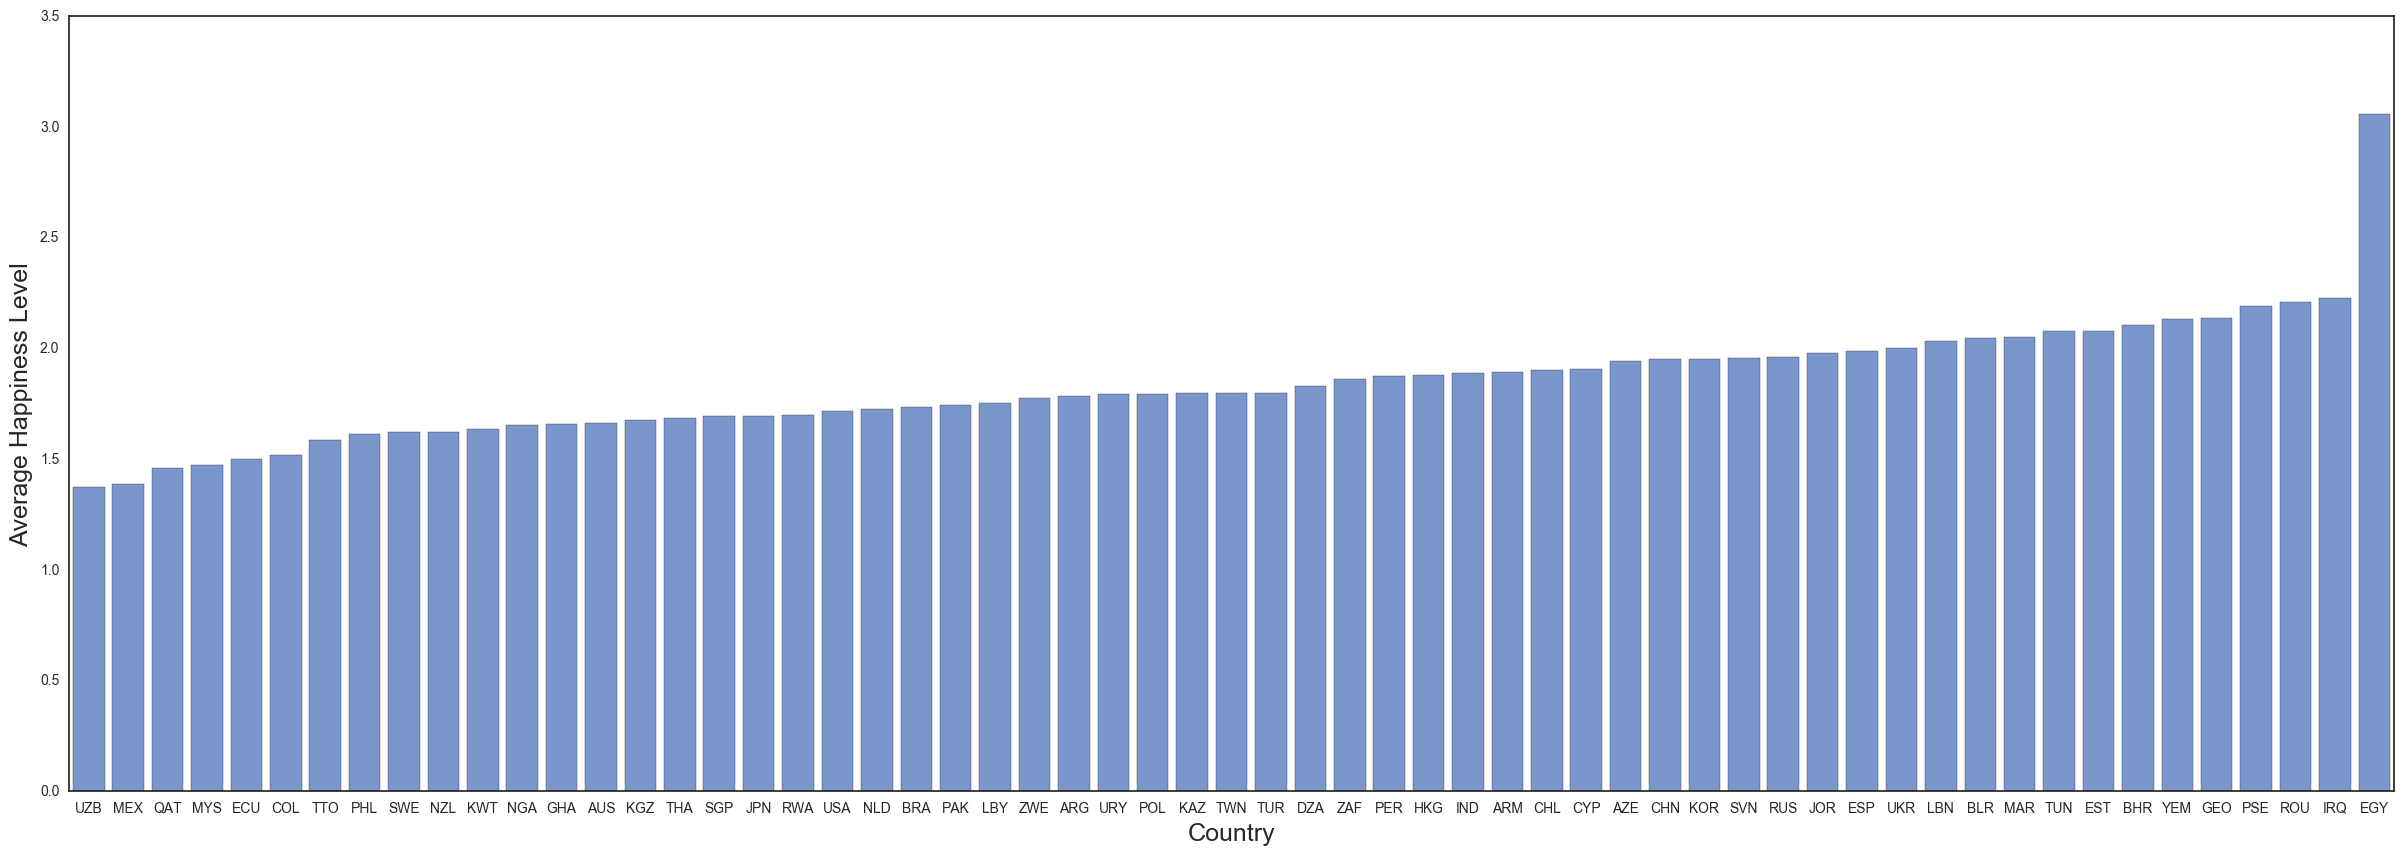

In [48]:
plt.figure(figsize=(30,10))
sns.barplot(avg_data.index, avg_data.values, alpha=0.8, color=color[0])
plt.ylabel('Average Happiness Level', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.show()

In [50]:
print 'The number of countries surveyed is' , df_raw['V2A'].unique().shape[0],'.'

 The number of countries surveyed is 61 .


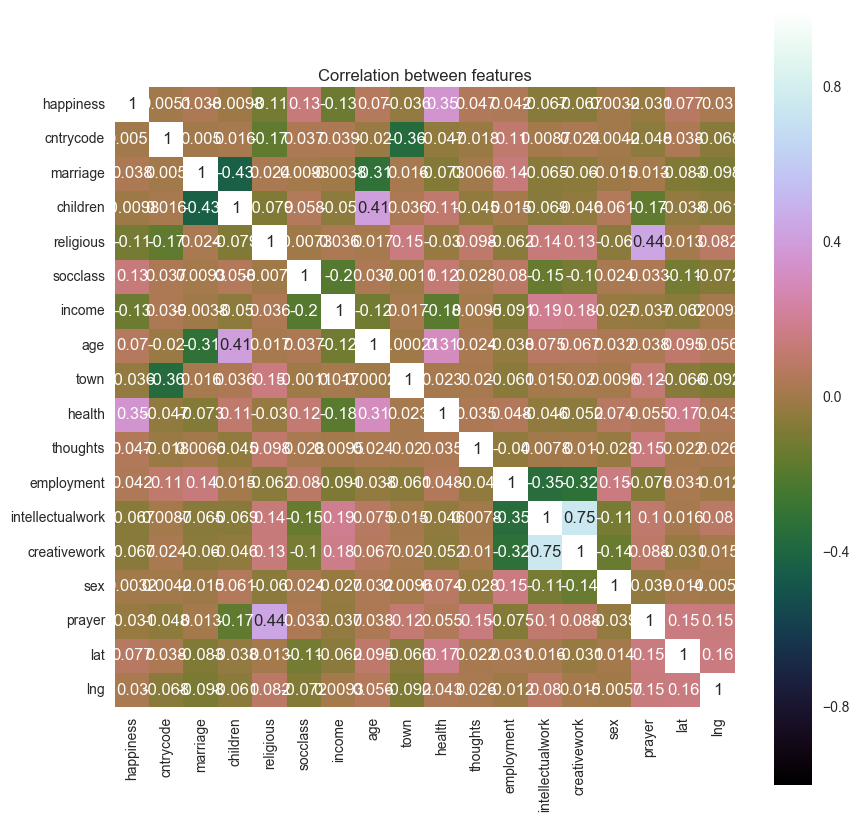

In [51]:
corr=df_merged.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')